In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/refs/heads/main/Big_Mart_Sales_Figure.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [5]:
df.nunique()

,0
Item_Identifier,1559
Item_Weight,415
Item_Fat_Content,5
Item_Visibility,7880
Item_Type,16
Item_MRP,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3


**Seperate numerical and non-numerical data**

In [6]:
df_num = df.select_dtypes(include='number')
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [7]:
df_non_num = df.select_dtypes(exclude='number')
df_non_num.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [8]:
df_non_num.nunique()

,0
Item_Identifier,1559
Item_Fat_Content,5
Item_Type,16
Outlet_Identifier,10
Outlet_Size,3
Outlet_Location_Type,3
Outlet_Type,4


In [9]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [10]:
#Create a function that can return 'low fat' if it is ['Low Fat', 'low fat', 'LF'] else return 'regular'

def fix_item_fat_content(fat_type):
  if fat_type in ['Low Fat', 'low fat', 'LF']:
    return 'low fat'
  else:
    return 'regular'

In [11]:
fix_item_fat_content('LF')

'low fat'

In [12]:
fix_item_fat_content('reg')

'regular'

* apply() - used to apply a user defined function on a given data column

In [13]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].apply(fix_item_fat_content)

In [14]:
df['Item_Fat_Content'].unique()

array(['low fat', 'regular'], dtype=object)

In [15]:
df_non_num = df.select_dtypes(exclude='number')
df_non_num.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,low fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,low fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,low fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [16]:
df_non_num.nunique()

,0
Item_Identifier,1559
Item_Fat_Content,2
Item_Type,16
Outlet_Identifier,10
Outlet_Size,3
Outlet_Location_Type,3
Outlet_Type,4


In [17]:
df_non_num['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [18]:
df_non_num['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [19]:
df_non_num['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [20]:
text = 'OUT049'
int(text[-2:])

49

In [21]:
def fix_out_ide(identifier):
  return int(identifier[-2:])

In [22]:
fix_out_ide('dhjkgffh76')

76

In [23]:
df['Outlet_Identifier'] = df['Outlet_Identifier'].apply(fix_out_ide)

In [24]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,10,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


In [25]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [26]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [27]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [28]:
df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [29]:
df['Item_Identifier'].nunique()

1559

In [30]:
df.shape

(8523, 12)

In [31]:
def item_ide(identifier):
  return identifier[:2]

item_ide('FDA15')

'FD'

In [32]:
lambda x : x[:2]

<function __main__.<lambda>(x)>

In [33]:
df['Item_Identifier'] = df['Item_Identifier'].apply(lambda x : x[:2])

In [34]:
#df['Item_Identifier'].apply(lambda x : x[:3]).nunique()

In [35]:
#df['Item_Identifier'].apply(lambda x : x[-2:]).nunique()

In [36]:
#df['Item_Identifier'].apply(lambda x : x[:3]).value_counts()

In [37]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,low fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,low fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,regular,0.000000,Fruits and Vegetables,182.0950,10,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,low fat,0.000000,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


In [38]:
age = 2025 - df['Outlet_Establishment_Year']
age

,Outlet_Establishment_Year
0,26
1,16
2,26
3,27
4,38
...,...
8518,38
8519,23
8520,21
8521,16


In [39]:
df.insert(7,"Outlet_age",age)

In [40]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_age,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,low fat,0.016047,Dairy,249.8092,49,26,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,18,16,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,low fat,0.016760,Meat,141.6180,49,26,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,regular,0.000000,Fruits and Vegetables,182.0950,10,27,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,low fat,0.000000,Household,53.8614,13,38,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
df = df.drop(columns = ['Outlet_Establishment_Year'])

In [42]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,low fat,0.016047,Dairy,249.8092,49,26,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,18,16,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,low fat,0.016760,Meat,141.6180,49,26,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,regular,0.000000,Fruits and Vegetables,182.0950,10,27,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,low fat,0.000000,Household,53.8614,13,38,High,Tier 3,Supermarket Type1,994.7052


**Handling Missing values**

In [43]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_age,0
Outlet_Size,2410
Outlet_Location_Type,0


In [44]:
df['Item_Weight']

,Item_Weight
0,9.300
1,5.920
2,17.500
3,19.200
4,8.930
...,...
8518,6.865
8519,8.380
8520,10.600
8521,7.210


In [45]:
print(df['Item_Weight'].mean())
print(df['Item_Weight'].median())

12.857645184135976
12.6


<Axes: ylabel='Frequency'>

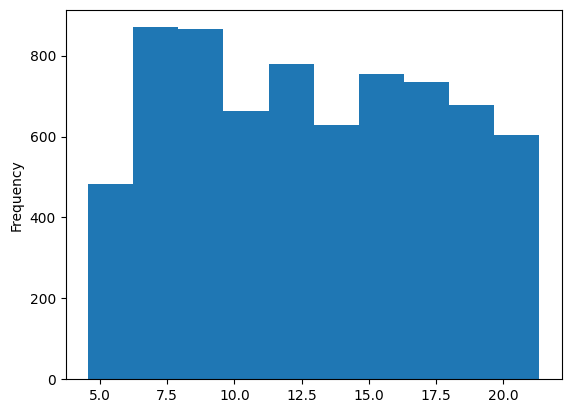

In [46]:
df['Item_Weight'].plot.hist()

* The weight column is having uniform data distribution
* The mean and median values are very close to each other
* It has not outliers
* Use mean or median to fill the missing values
* fillna() - can be used to fill the missing values

In [48]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [49]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,low fat,0.016047,Dairy,249.8092,49,26,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,18,16,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,low fat,0.016760,Meat,141.6180,49,26,Medium,Tier 1,Supermarket Type1,2097.2700


In [50]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_age,0
Outlet_Size,2410
Outlet_Location_Type,0


In [53]:
df.shape

(8523, 12)

In [52]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [57]:
df['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 3,3350
Tier 2,2785
Tier 1,2388


In [55]:
pd.crosstab( df['Outlet_Location_Type'] , df['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0,930,1458
Tier 2,0,0,930
Tier 3,932,1863,0


In [58]:
df['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


In [56]:
pd.crosstab( df['Outlet_Type'] , df['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,0,0,528
Supermarket Type1,932,930,1860
Supermarket Type2,0,928,0
Supermarket Type3,0,935,0


* We find relation between Outlet_location_type and outlet_size, We can use this information to fill the missing values in outlet size columns
  * For Tier 1 and Tier 2 cities majority of Outlets 'Small'
  * For Tier 3 cities majority of Outlets 'Medium'

In [59]:
def fix_outlet_size(outlet_loc_type):
  if outlet_loc_type in ['Tier 1' , 'Tier 2']:
    return 'Small'
  else:
    return 'Medium'

In [62]:
fix_outlet_size('Tier 3')

'Medium'

In [63]:
df['Outlet_Location_Type'].apply(fix_outlet_size)

,Outlet_Location_Type
0,Small
1,Medium
2,Small
3,Medium
4,Medium
...,...
8518,Medium
8519,Small
8520,Small
8521,Medium


In [66]:
#whereever the data is already existing, that row will not get affected but
#if a value is missing it will be filled up with crossponding row value from table of previous execution

df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Location_Type'].apply(fix_outlet_size))

In [67]:
df.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,low fat,0.016047,Dairy,249.8092,49,26,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,18,16,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,low fat,0.016760,Meat,141.6180,49,26,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,regular,0.000000,Fruits and Vegetables,182.0950,10,27,Medium,Tier 3,Grocery Store,732.3800
